#  1. KHẢO SÁT DỮ LIỆU Ô NHIỄM KHÔNG KHÍ CÁC THÀNH PHỐ LỚN TẠI ẤN ĐỘ



In [ ]:
#import thư viện
import numpy as np, pandas as pd
import matplotlib.pyplot as plt #Thư viện cho vẽ hình
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120}) #Cài đặt kích thước cho toàn bộ các hình trong file notebook này giống nhau

In [ ]:
#Link data
link='https://drive.google.com/file/d/1_GA1hsn9qu9dips3RXg0JJXZlZ8xaG-n/view?usp=sharing'

In [ ]:
#Đọc data
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path,encoding= 'unicode_escape')

### 1.1. Khảo sát dữ liệu để đánh giá chất lượng không khí Ấn Độ nói chung
Bộ dữ liệu lấy từ https://cpcb.gov.in/


In [ ]:
#Khảo sát dữ liệu toàn bộ dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  object 
 1   Date     29531 non-null  object 
 2   PM2.5    24933 non-null  float64
 3   PM10     18391 non-null  float64
 4   NO       25949 non-null  float64
 5   NO2      25946 non-null  float64
 6   NOx      25346 non-null  float64
 7   NH3      19203 non-null  float64
 8   CO       27472 non-null  float64
 9   SO2      25677 non-null  float64
 10  O3       25509 non-null  float64
 11  Benzene  23908 non-null  float64
 12  Toluene  21490 non-null  float64
 13  Xylene   11422 non-null  float64
dtypes: float64(12), object(2)
memory usage: 3.2+ MB


In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,Ahmedabad,01/01/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00
1,Ahmedabad,02/01/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77
2,Ahmedabad,03/01/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25
3,Ahmedabad,04/01/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00
4,Ahmedabad,05/01/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78


In [ ]:
new_df = df.copy()

#### 1.1.1. Thêm bộ dữ liệu quy chuẩn.

- Ngưỡng an toàn cho phép của WHO nói chung và Ấn Độ nói riêng để so sánh với các thành phố ở Ấn Độ, gồm:

PM2.5
PM10
NO
NO2
NOx
NH3
CO
SO2
O3
Benzene
Toluene
Xylene

Do NOx và NH3 không có ngưỡng cụ thể theo chuẩn WHO nên tôi xin phép bỏ 2 biến liên quan.



In [ ]:

# Tạo dictionary chứa dữ liệu quy chuẩn
data = {
    'Quy chuẩn': ['Ấn Độ', 'WHO'],
    'PM2.5': [60, 10],
    'PM10': [100, 20],
    'NO': [80, 40],
    'NO2': [80, 40],
    'CO': [2, 4],
    'SO2': [80, 20],
    'O3': [100, 100],
    'Benzene': [5, 1],
    'Toluene': [20, 260],
    'Xylene': [10, 260]
}

# Tạo DataFrame từ dictionary
standards_table = pd.DataFrame(data)

# In ra bảng quy chuẩn
print(standards_table)


  Quy chuẩn  PM2.5  PM10  NO  NO2  CO  SO2   O3  Benzene  Toluene  Xylene
0     Ấn Độ     60   100  80   80   2   80  100        5       20      10
1       WHO     10    20  40   40   4   20  100        1      260     260


#### 1.1.2. Xử lí dữ liệu để khảo sát chi tiết

- Do kiểu dữ liệu ngày,tháng chưa chuẩn nên cần chuẩn hóa lại

- Dữ liệu khảo sát chỉ nên lấy trước 2020 vì 2020 xảy ra dịch Covid và Ấn Độ tiến hành phong tỏa nên số liệu sẽ chênh lệch lớn

In [ ]:
# Chuyển đổi cột "Date" thành kiểu dữ liệu datetime
df['Date'] = pd.to_datetime(df['Date'])

# Tạo cột "Year" từ cột "Date"
df['Year'] = df['Date'].dt.year

# Tạo bảng "pollution_by_year_df" chỉ chứa dữ liệu ô nhiễm của các thành phố theo năm
pollution_by_year_full_df = df.drop(columns=['Date']).groupby(['City', 'Year']).mean().reset_index()

# Lọc dữ liệu từ năm 2015 đến hết năm 2019
pollution_by_year_df = pollution_by_year_full_df.loc[(pollution_by_year_full_df['Year'] >= 2015) & (pollution_by_year_full_df['Year'] <= 2019)]

# In ra bảng "pollution_by_year_df"
print(pollution_by_year_df)

#Số lượng thành phố ở Ấn Độ
print(pollution_by_year_df['City'].nunique())


                   City  Year      PM2.5        PM10         NO        NO2  \
0             Ahmedabad  2015  79.262545         NaN  13.589770  21.254118   
1             Ahmedabad  2016  62.501200         NaN  14.889120  14.962880   
2             Ahmedabad  2017  88.756438         NaN  30.774462  78.433077   
3             Ahmedabad  2018  74.688788         NaN  33.244408  84.937493   
4             Ahmedabad  2019  62.118468  120.146256  26.133844  91.090864   
..                  ...   ...        ...         ...        ...        ...   
96   Thiruvananthapuram  2019  25.370399   51.705411   2.352123   7.050503   
98        Visakhapatnam  2016  44.859153   87.930730  16.662528  42.408539   
99        Visakhapatnam  2017  56.866534  108.467898  13.123693  33.400385   
100       Visakhapatnam  2018  50.433072  116.658295  12.441936  38.963750   
101       Visakhapatnam  2019  47.378584  115.198261  13.957831  37.734113   

           NOx        NH3         CO         SO2         O3   B

<ipython-input-8-f8555ccbc0c0>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


#### 1.1.3. So sánh dữ liệu đầu vào với bộ quy chuẩn

- 0: Quy chuẩn của WHO
- 1: Quy chuẩn của Ấn Độ

Tìm những thành phố vượt ngưỡng cho phép
- Những biến quan trọng cần khảo sát
PM2.5
PM10
NO2
SO2
CO

 - Những biến không quan trọng cần khảo sát trong bối cảnh Ấn Độ có thể bao gồm NH3 (amoni), O3 (ozon), Benzene, Toluene và Xylene.


World Health Organization (WHO): https://www.who.int/airpollution/en/
Central Pollution Control Board (CPCB) India: http://cpcb.nic.in/


In [ ]:
#Khảo sát
print(pollution_by_year_df.info())

#Tìm các biến N/A
print('-----------------------------------')
print(pollution_by_year_df.isnull().sum())

#Tìm biến trung ngoại trừ City và year
print('-----------------------------------')
print(pollution_by_year_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 101
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     77 non-null     object 
 1   Year     77 non-null     int64  
 2   PM2.5    70 non-null     float64
 3   PM10     54 non-null     float64
 4   NO       73 non-null     float64
 5   NO2      73 non-null     float64
 6   NOx      73 non-null     float64
 7   NH3      56 non-null     float64
 8   CO       77 non-null     float64
 9   SO2      74 non-null     float64
 10  O3       75 non-null     float64
 11  Benzene  68 non-null     float64
 12  Toluene  62 non-null     float64
 13  Xylene   36 non-null     float64
dtypes: float64(12), int64(1), object(1)
memory usage: 9.0+ KB
None
-----------------------------------
City        0
Year        0
PM2.5       7
PM10       23
NO          4
NO2         4
NOx         4
NH3        21
CO          0
SO2         3
O3          2
Benzene     9
Toluene    15
Xy

In [ ]:
# Tạo một mask (mặt nạ) chỉ định các thành phố có giá trị null trong các cột quan tâm
mask = pollution_by_year_df['PM2.5'].isnull() | pollution_by_year_df['PM10'].isnull() | pollution_by_year_df['NO2'].isnull() | pollution_by_year_df['SO2'].isnull() | pollution_by_year_df['CO'].isnull()

# Lọc các thành phố theo mask
df_null_cities = pollution_by_year_df[mask]

# Lấy danh sách các thành phố
null_cities = df_null_cities['City'].tolist()




In [ ]:
# Tạo một mask (mặt nạ) chỉ định các thành phố không thuộc danh sách null_cities
mask1 = ~pollution_by_year_df['City'].isin(null_cities)

# Lọc bảng pollution_by_year_df theo mask
pollution_by_cities_df = pollution_by_year_df[mask1]

# In ra bảng filtered_pollution_by_year_df
print(pollution_by_cities_df)

                   City  Year       PM2.5        PM10         NO        NO2  \
7             Amaravati  2017   84.006053  139.102105   5.106053  37.028684   
8             Amaravati  2018   37.779438   81.884006   5.690504  26.384566   
9             Amaravati  2019   38.854811   77.666258   4.343616  22.992736   
11             Amritsar  2017   73.576360  144.685784  20.986491  20.601193   
12             Amritsar  2018   54.753852  123.707216  18.441287  21.823040   
13             Amritsar  2019   50.687637   97.319341  17.147445  15.830467   
15            Bengaluru  2015   28.725245   67.339000   6.855562  19.923644   
16            Bengaluru  2016   47.109692  103.876486  10.521856  30.090997   
17            Bengaluru  2017   35.313603   84.959749  10.316959  36.346438   
18            Bengaluru  2018   34.851965   79.467164  11.494093  28.563681   
19            Bengaluru  2019   35.424767   75.614658   9.931233  28.376438   
21               Bhopal  2019   67.288491  143.37424

In [ ]:
# So sánh bảng "pollution_by_year_df" với bảng chuẩn WHO
exceeded_standards_WHO = pollution_by_cities_df[
    (pollution_by_cities_df['PM2.5'] > standards_table.loc[0, 'PM2.5']) |
    (pollution_by_cities_df['PM10'] > standards_table.loc[0, 'PM10']) |
    (pollution_by_cities_df['NO2'] > standards_table.loc[0, 'NO2']) |
    (pollution_by_cities_df['CO'] > standards_table.loc[0, 'CO']) |
    (pollution_by_cities_df['SO2'] > standards_table.loc[0, 'SO2'])
]

# In ra số lượng các thành phố vượt ngưỡng
print(exceeded_standards_WHO['City'].nunique())


12


In [ ]:
# So sánh bảng "top_5_cities_per_year" với bảng chuẩn India
exceeded_standards_India = pollution_by_cities_df[
    (pollution_by_cities_df['PM2.5'] > standards_table.loc[1, 'PM2.5']) |
    (pollution_by_cities_df['PM10'] > standards_table.loc[1, 'PM10']) |
    (pollution_by_cities_df['NO2'] > standards_table.loc[1, 'NO2']) |
    (pollution_by_cities_df['CO'] > standards_table.loc[1, 'CO']) |
    (pollution_by_cities_df['SO2'] > standards_table.loc[1, 'SO2'])
]

# In ra số lượng các thành phố vượt ngưỡng
print(exceeded_standards_India['City'].nunique())


15


In [ ]:
# Tìm những thành phố vượt ngưỡng Ấn Độ và WHO
common_cities = set(exceeded_standards_India['City']).intersection(set(exceeded_standards_WHO['City']))

print(len(common_cities))


12


## 1.2. Đánh giá cá nhân về kết quả khảo sát.

- Chúng ta có 12/23 thành phố vượt ngưỡng an toàn về không khí cho phép

## 1.3. Khảo sát dữ liệu của những thành phố ô nhiễm nhất

### 1.3.1. Trích xuất dữ liệu những thành phố ô nhiễm nhất

In [ ]:
# Trích xuất dữ liệu ban đầu dựa vào những thành phố vượt ngưỡng an toàn về ô nhiễm không khí mà ẤN ĐỘ VÀ WHO cho phép
df['Date'] = pd.to_datetime(df['Date'])
cities_exceeded_standards_df = df[(df['City'].isin(common_cities)) & (df['Date'].dt.year >= 2015) & (df['Date'].dt.year <= 2019)]
print(cities_exceeded_standards_df)

                City       Date  PM2.5    PM10     NO    NO2    NOx    NH3  \
2122       Amaravati 2017-11-24  71.36  115.75   1.75  20.65  12.40  12.19   
2123       Amaravati 2017-11-25  81.40  124.50   1.44  20.50  12.08  10.72   
2124       Amaravati 2017-11-26  78.32  129.06   1.26  26.00  14.85  10.28   
2125       Amaravati 2017-11-27  88.76  135.32   6.60  30.85  21.77  12.91   
2126       Amaravati 2017-11-28  64.18  104.09   2.56  28.07  17.01  11.42   
...              ...        ...    ...     ...    ...    ...    ...    ...   
29343  Visakhapatnam 2019-12-27  51.79     NaN  34.78  48.39  54.01   9.56   
29344  Visakhapatnam 2019-12-28  74.53     NaN   4.21  33.50  21.25   9.72   
29345  Visakhapatnam 2019-12-29  41.00     NaN   2.37  20.94  13.07   6.78   
29346  Visakhapatnam 2019-12-30  44.79     NaN   3.22  35.67  21.58  11.14   
29347  Visakhapatnam 2019-12-31  52.33   99.33   3.51  33.70  20.78  11.69   

         CO    SO2      O3  Benzene  Toluene  Xylene  Year  
21

### 1.3.2. Khảo sát dữ liệu

In [ ]:
mis_val = cities_exceeded_standards_df.isnull().sum()

mis_val_percent = 100 * mis_val / len(cities_exceeded_standards_df)
print(mis_val_percent)

Mis_val = pd.concat([mis_val, mis_val_percent], axis=1)
Mis_val = Mis_val.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

City        0.000000
Date        0.000000
PM2.5       7.835070
PM10       11.748227
NO          5.270069
NO2         4.876127
NOx         5.523943
NH3         9.174473
CO          2.731332
SO2         7.038431
O3          7.362339
Benzene     8.474131
Toluene    15.223672
Xylene     50.161954
Year        0.000000
dtype: float64


In [ ]:
Mis_val = Mis_val[Mis_val.iloc[:,1] != 0].sort_values(by = '% of Total Values',
                                                      ascending = False).style.background_gradient(cmap = 'Reds')

Mis_val

,Missing Values,% of Total Values
Xylene,5730,50.161954
Toluene,1739,15.223672
PM10,1342,11.748227
NH3,1048,9.174473
Benzene,968,8.474131
PM2.5,895,7.835070
O3,841,7.362339
SO2,804,7.038431
NOx,631,5.523943
NO,602,5.270069


In [ ]:
import plotly.graph_objects as go

# Chuyển đổi cột 'Date' sang kiểu dữ liệu datetime
cities_exceeded_standards_df.iloc[:, 1] = pd.to_datetime(cities_exceeded_standards_df['Date'])


<ipython-input-18-918a8fe465a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_exceeded_standards_df.iloc[:, 1] = pd.to_datetime(cities_exceeded_standards_df['Date'])
<ipython-input-18-918a8fe465a3>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cities_exceeded_standards_df.iloc[:, 1] = pd.to_datetime(cities_exceeded_standards_df['Date'])


In [ ]:
cities_exceeded_standards_df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,Year
2122,Amaravati,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,2017
2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,2017
2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,2017
2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,2017
2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29343,Visakhapatnam,2019-12-27,51.79,NaN,34.78,48.39,54.01,9.56,1.24,9.01,34.62,6.72,12.41,4.24,2019
29344,Visakhapatnam,2019-12-28,74.53,NaN,4.21,33.50,21.25,9.72,1.21,6.30,42.20,5.58,9.34,2.23,2019
29345,Visakhapatnam,2019-12-29,41.00,NaN,2.37,20.94,13.07,6.78,0.74,6.25,70.48,3.76,12.04,0.71,2019
29346,Visakhapatnam,2019-12-30,44.79,NaN,3.22,35.67,21.58,11.14,1.06,9.71,77.40,4.41,7.69,2.16,2019


In [ ]:
# Tính toán số lượng giá trị thiếu theo ngày
missing_counts_daily = cities_exceeded_standards_df[cities_exceeded_standards_df.isnull().any(axis=1)].groupby(cities_exceeded_standards_df['Date'].dt.date).size()

# Tính toán số lượng giá trị thiếu theo tháng
missing_counts_monthly = cities_exceeded_standards_df[cities_exceeded_standards_df.isnull().any(axis=1)].groupby(cities_exceeded_standards_df['Date'].dt.to_period('M')).size()
missing_counts_monthly.index = missing_counts_monthly.index.astype(str)  # Chuyển đổi Period thành chuỗi str

# Tính toán số lượng giá trị thiếu theo năm
missing_counts_yearly = cities_exceeded_standards_df[cities_exceeded_standards_df.isnull().any(axis=1)].groupby(cities_exceeded_standards_df['Date'].dt.to_period('Y')).size()
missing_counts_yearly.index = missing_counts_yearly.index.astype(str)  # Chuyển đổi Period thành chuỗi str

# Tạo subplot cho 3 biểu đồ
fig = make_subplots(rows=3, cols=1, subplot_titles=("Daily", "Monthly", "Yearly"), row_heights=[0.6, 0.6, 1], vertical_spacing=0.2)

# Biểu đồ theo ngày
fig.add_trace(go.Bar(x=missing_counts_daily.index, y=missing_counts_daily.values, name='Daily', marker_color='red'), row=1, col=1)


# Biểu đồ theo tháng
fig.add_trace(go.Bar(x=missing_counts_monthly.index, y=missing_counts_monthly.values, name='Monthly', marker_color='green'), row=2, col=1)


# Biểu đồ theo năm
fig.add_trace(go.Bar(x=missing_counts_yearly.index, y=missing_counts_yearly.values, name='Yearly', marker_color='orange'), row=3, col=1)


# Cập nhật layout cho từng subplot
fig.update_layout(
    title="Missing Values Count",
    showlegend=False,
    plot_bgcolor='white',
     margin=dict(l=60, r=60, t=100, b=60)  # Điều chỉnh giãn cách xung quanh biểu đồ
)


# Cập nhật layout cho các biểu đồ riêng lẻ
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Month", row=2, col=1)
fig.update_xaxes(title_text="Year", row=3, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_yaxes(title_text="Count", row=3, col=1)

fig.show()


NameError: ignored

### 1.3.3. Dùng thuật toán K-Mean để điền dữ liệu thiếu

In [ ]:
from sklearn.impute import KNNImputer

# Tạo một bản sao của DataFrame để thực hiện điền giá trị thiếu
df_filled = cities_exceeded_standards_df.copy()

# Chọn các cột chứa giá trị thiếu
cols_with_missing_values = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Tạo một đối tượng KNNImputer với số láng giềng k=5 (có thể điều chỉnh theo nhu cầu)
imputer = KNNImputer(n_neighbors=5)

# Áp dụng KNNImputer cho các cột chứa giá trị thiếu
df_filled[cols_with_missing_values] = imputer.fit_transform(df_filled[cols_with_missing_values])

# In ra DataFrame đã điền giá trị thiếu
print(df_filled)


                City       Date  PM2.5     PM10     NO    NO2    NOx    NH3  \
2122       Amaravati 2017-11-24  71.36  115.750   1.75  20.65  12.40  12.19   
2123       Amaravati 2017-11-25  81.40  124.500   1.44  20.50  12.08  10.72   
2124       Amaravati 2017-11-26  78.32  129.060   1.26  26.00  14.85  10.28   
2125       Amaravati 2017-11-27  88.76  135.320   6.60  30.85  21.77  12.91   
2126       Amaravati 2017-11-28  64.18  104.090   2.56  28.07  17.01  11.42   
...              ...        ...    ...      ...    ...    ...    ...    ...   
29343  Visakhapatnam 2019-12-27  51.79  128.934  34.78  48.39  54.01   9.56   
29344  Visakhapatnam 2019-12-28  74.53  128.074   4.21  33.50  21.25   9.72   
29345  Visakhapatnam 2019-12-29  41.00   92.274   2.37  20.94  13.07   6.78   
29346  Visakhapatnam 2019-12-30  44.79   96.986   3.22  35.67  21.58  11.14   
29347  Visakhapatnam 2019-12-31  52.33   99.330   3.51  33.70  20.78  11.69   

         CO    SO2      O3  Benzene  Toluene  Xylen

In [ ]:
statistics = cities_exceeded_standards_df.groupby('City').describe()
print(statistics)

                PM2.5                                                 \
                count        mean        std    min      25%     50%   
City                                                                   
Amaravati       712.0   40.726882  28.725237   6.48  17.8350  31.550   
Amritsar        917.0   58.948691  54.759884   2.85  34.1400  46.920   
Bengaluru      1680.0   36.403071  22.816140   1.72  21.3900  31.385   
Bhopal          106.0   67.288491  33.286624   3.40  44.6100  69.615   
Brajrajnagar    610.0   63.260967  37.068433   2.54  32.3075  57.605   
Chandigarh      106.0   64.322264  30.823432  13.62  41.7900  58.355   
Delhi          1824.0  120.896102  84.276088  10.24  59.8275  97.750   
Guwahati        319.0   57.803386  63.056373   5.39  23.6600  42.870   
Hyderabad      1708.0   48.314379  40.054633   4.83  25.9550  43.710   
Jaipur          919.0   57.326104  27.564759  11.50  39.1300  52.640   
Kolkata         576.0   69.862448  62.792394   3.56  24.3925  45

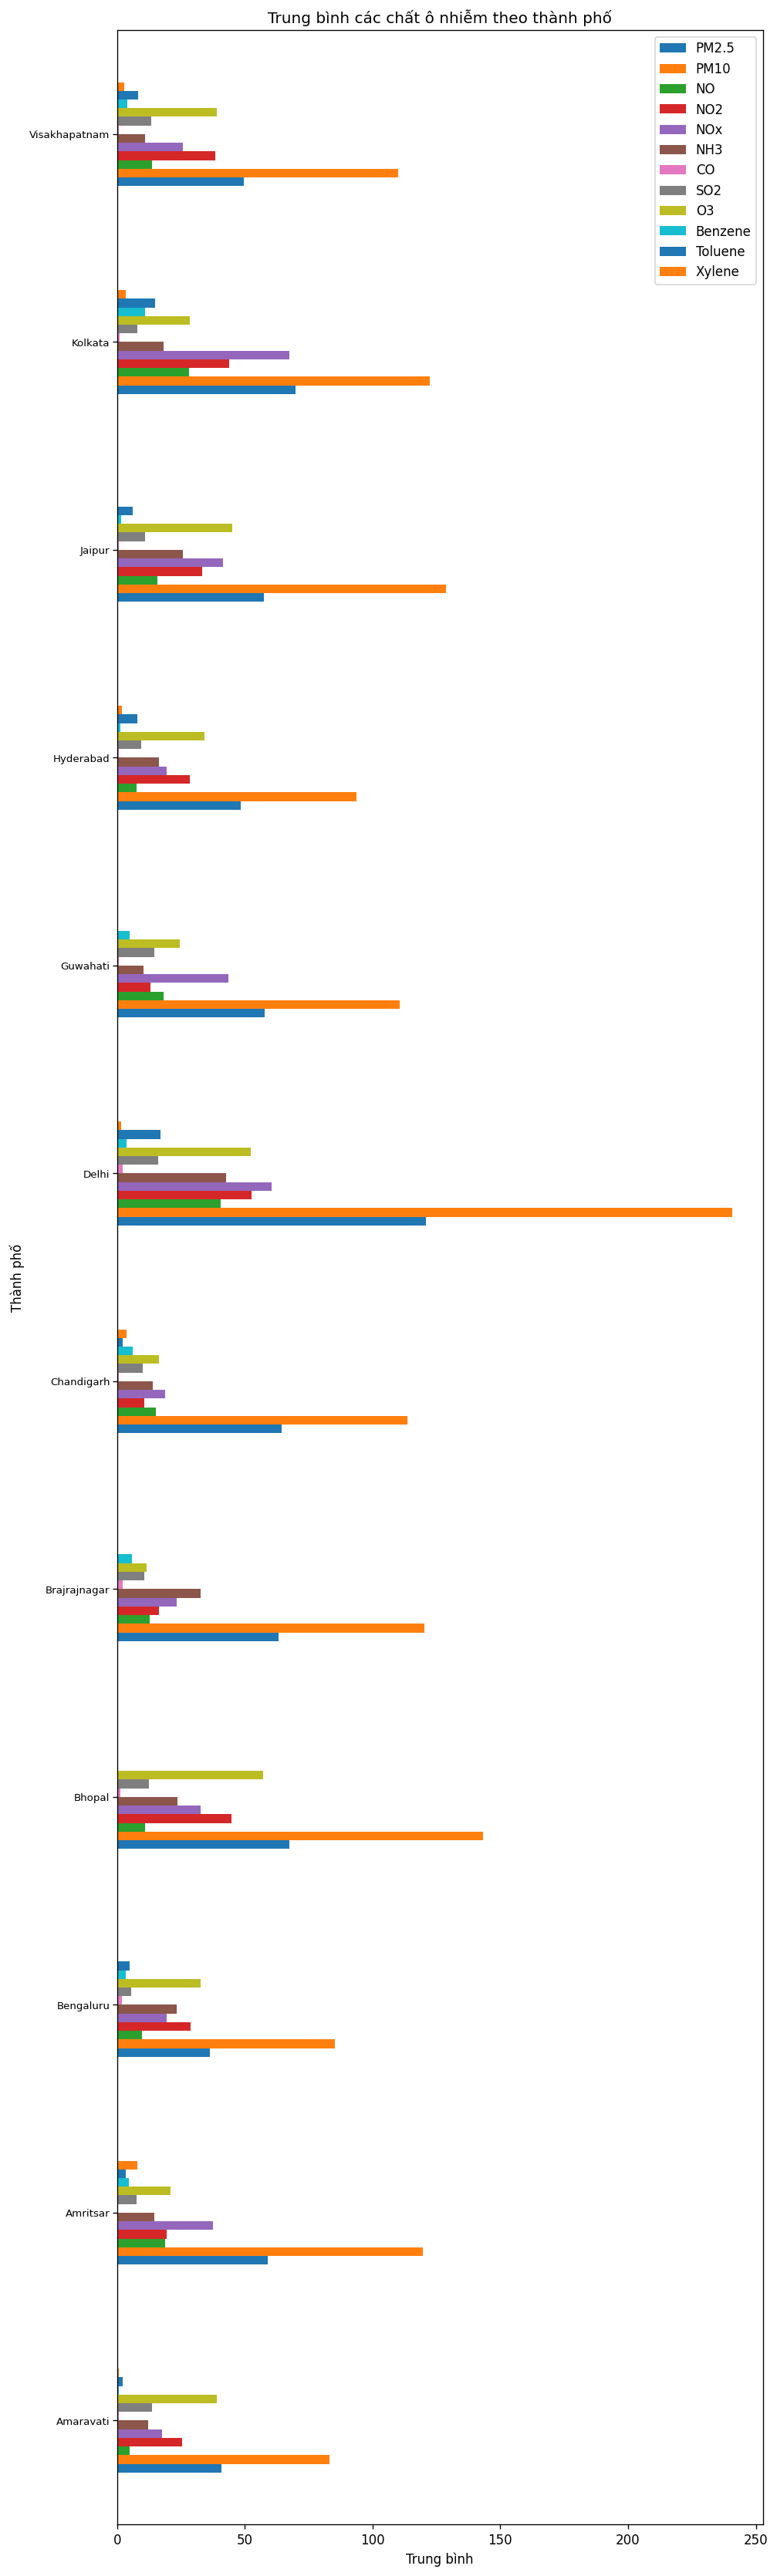

In [ ]:
# Tạo DataFrame chứa giá trị trung bình của các biến
mean_values = cities_exceeded_standards_df.groupby('City')[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']].mean()

# Trực quan hóa dữ liệu
fig, ax = plt.subplots(figsize=(9, 35)) #figsize(width, height) để tăng kích thước của hình vẽ

mean_values.plot(kind='barh', ax=ax)

plt.title('Trung bình các chất ô nhiễm theo thành phố')
plt.xlabel('Trung bình')
plt.ylabel('Thành phố')

# Điều chỉnh kích thước và khoảng cách của nhãn cột
ax.tick_params(axis='y', labelsize=8,pad = 2)


plt.show()


In [ ]:
# Tạo DataFrame chứa thông tin về số lượng mẫu quan sát, phạm vi dữ liệu và độ lệch chuẩn
data = {
    'City': cities_exceeded_standards_df['City'].unique(),
    'Sample Count': cities_exceeded_standards_df.groupby('City')['Date'].count().values,
    'Data Range': cities_exceeded_standards_df.groupby('City')['Date'].apply(lambda x: x.max() - x.min()).values,
    'Standard Deviation PM2.5': cities_exceeded_standards_df.groupby('City')['PM2.5'].std().values,
    'Standard Deviation PM10': cities_exceeded_standards_df.groupby('City')['PM10'].std().values,
    'Standard Deviation NO': cities_exceeded_standards_df.groupby('City')['NO'].std().values,
    'Standard Deviation NO2': cities_exceeded_standards_df.groupby('City')['NO2'].std().values,
    'Standard Deviation NOx': cities_exceeded_standards_df.groupby('City')['NOx'].std().values,
     'Standard Deviation NH3': cities_exceeded_standards_df.groupby('City')['NH3'].std().values,
    'Standard Deviation CO': cities_exceeded_standards_df.groupby('City')['CO'].std().values,
    'Standard Deviation SO2': cities_exceeded_standards_df.groupby('City')['SO2'].std().values,
    'Standard Deviation Benzene': cities_exceeded_standards_df.groupby('City')['Benzene'].std().values,
    'Standard Deviation Toluene': cities_exceeded_standards_df.groupby('City')['Toluene'].std().values,
     'Standard Deviation Xylene': cities_exceeded_standards_df.groupby('City')['Xylene'].std().values

}

statistics = pd.DataFrame(data)


In [ ]:
statistics

,City,Sample Count,Data Range,Standard Deviation PM2.5,Standard Deviation PM10,Standard Deviation NO,Standard Deviation NO2,Standard Deviation NOx,Standard Deviation NH3,Standard Deviation CO,Standard Deviation SO2,Standard Deviation Benzene,Standard Deviation Toluene,Standard Deviation Xylene
0,Amaravati,768,1083 days,28.725237,45.618355,4.433950,21.770997,13.717012,6.100556,0.339290,7.044330,3.716475,3.886199,7.001727
1,Amritsar,1038,1092 days,54.759884,74.396517,14.182426,16.143677,24.466716,13.328398,0.559555,6.662968,3.631163,3.119330,6.396710
2,Bengaluru,1826,1825 days,22.816140,39.009214,7.666120,13.383016,15.443672,12.824763,4.152470,4.354480,17.225929,16.713744,NaN
3,Bhopal,106,355 days,33.286624,62.132800,6.288281,13.977636,10.312991,10.232313,0.273588,5.883634,NaN,NaN,NaN
4,Brajrajnagar,755,902 days,37.068433,66.993700,8.547629,7.573575,14.584388,25.945215,1.259104,4.524399,27.836258,NaN,NaN
5,Chandigarh,121,355 days,30.823432,40.750416,12.196323,8.587039,13.583078,14.741705,0.206559,2.577582,6.382846,2.250068,9.320147
6,Delhi,1826,1825 days,84.276088,122.882885,33.841685,22.662034,38.036289,17.825838,2.664679,8.287396,2.486212,15.656309,2.505001
7,Guwahati,319,362 days,63.056373,106.143698,18.088827,4.997003,32.434435,8.559713,0.328524,5.032450,14.110877,NaN,NaN
8,Hyderabad,1823,1824 days,40.054633,41.264435,4.926620,16.509892,11.071572,8.476980,0.537574,7.569953,1.359137,9.693988,2.932409
9,Jaipur,931,1088 days,27.564759,56.222466,13.690918,15.421313,20.052382,13.493903,0.415128,3.016316,1.737578,5.320206,NaN


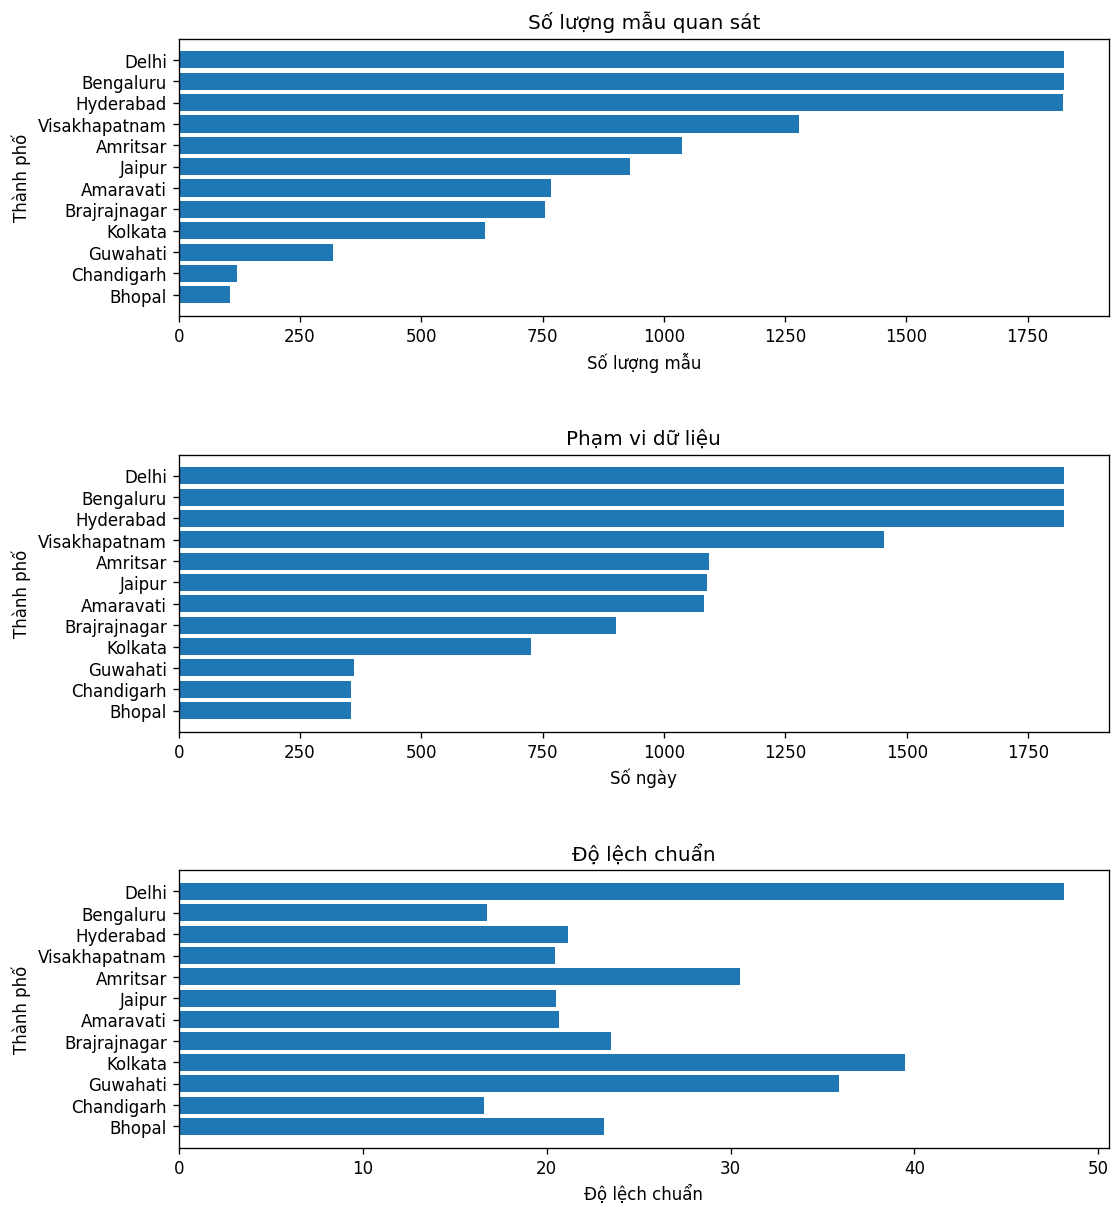

In [ ]:
# Sắp xếp DataFrame theo cột "Sample Count" giảm dần
statistics = statistics.sort_values('Sample Count', ascending=True)

# Vẽ biểu đồ
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

# Biểu đồ số lượng mẫu quan sát
axes[0].barh(statistics['City'], statistics['Sample Count'])
axes[0].set_title('Số lượng mẫu quan sát')
axes[0].set_xlabel('Số lượng mẫu')
axes[0].set_ylabel('Thành phố')

# Biểu đồ phạm vi dữ liệu
axes[1].barh(statistics['City'], statistics['Data Range'].dt.days)
axes[1].set_title('Phạm vi dữ liệu')
axes[1].set_xlabel('Số ngày')
axes[1].set_ylabel('Thành phố')

# Biểu đồ độ lệch chuẩn
axes[2].barh(statistics['City'], statistics[['Standard Deviation PM2.5', 'Standard Deviation PM10', 'Standard Deviation NO2', 'Standard Deviation SO2', 'Standard Deviation CO']].mean(axis=1))
axes[2].set_title('Độ lệch chuẩn')
axes[2].set_xlabel('Độ lệch chuẩn')
axes[2].set_ylabel('Thành phố')

# Cài đặt khoảng cách giữa các biểu đồ
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Hiển thị biểu đồ
plt.show()


### 1.3.4. Kết luận và ý nghĩa việc chọn New Delhi để phân tích
- Dựa trên dữ liệu khảo sát ta chọn Delhi làm dữ liệu để thực hiện mô hình dự báo về chất lượng không khí, cụ thể:
  1. Số lượng dữ liệu: Thủ độ New Delhi là một trong những thành phố có nhiều quan sát nhất, có giá trị phân tích.
  2. Phạm vi dữ liệu: Thủ đô New Delhi cung cấp dữ liệu đầy đủ từ khoảng 2015 đến 2020.
  2. Các thông số ô nhiễm Delhi là cao so với những đô thị khác.

# 2. DỰ BÁO CHẤT LƯỢNG KHÔNG KHÍ NEW DELHI - ẤN ĐỘ

## 2.1. Chuẩn bị dữ liệu New Delhi - Ấn Độ

- Một số giải thích:
 - Nguồn dữ liệu: https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india/code?datasetId=630055&sortBy=commentCount&searchQuery=delhi

 - Dữ liệu phân tích New Delhi được trích xuất từ bộ dữ liệu lấy từ trang Kaggle -> Nguồn dữ liệu Central Pollution Control Board: https://cpcb.nic.in/ thuộc chính phủ Ấn Độ.

 - Tôi chỉ lấy dữ liệu trước năm 2020.
   - Nguyên nhân: vì đại dịch covid dẫn tới số liệu không chuẩn xác khi phân tích.



In [ ]:
#import thư viện
import numpy as np, pandas as pd
import matplotlib.pyplot as plt #Thư viện cho vẽ hình
import seaborn as sns
plt.rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120}) #Cài đặt kích thước cho toàn bộ các hình trong file notebook này giống nhau

In [ ]:
#Link data
link='https://drive.google.com/file/d/1_GA1hsn9qu9dips3RXg0JJXZlZ8xaG-n/view?usp=sharing'

In [ ]:
#Đọc data
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path,encoding= 'unicode_escape')

In [ ]:
# Tạo df_delhi để lọc lấy dữ liệu New Delhi - Ấn Độ
df_delhi = df.groupby('City').get_group('Delhi')

In [ ]:
# Hiển thị và kiểm tra dữ liệu
print(df_delhi.head())

        City        Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO  \
10229  Delhi  01/01/2015  313.22  607.98  69.16  36.39  110.59   33.85  15.20   
10230  Delhi  02/01/2015  186.18  269.55  62.09  32.87   88.14   31.83   9.54   
10231  Delhi  03/01/2015   87.18  131.90  25.73  30.31   47.95   69.55  10.61   
10232  Delhi  04/01/2015  151.84  241.84  25.01  36.91   48.62  130.36  11.54   
10233  Delhi  05/01/2015  146.60  219.13  14.01  34.92   38.25  122.88   9.20   

        SO2     O3  Benzene  Toluene  Xylene  
10229  9.25  41.68    14.36    24.86    9.84  
10230  6.65  29.97    10.55    20.09    4.29  
10231  2.65  19.71     3.91    10.23    1.99  
10232  4.63  25.36     4.26     9.71    3.34  
10233  3.33  23.20     2.80     6.21    2.96  


In [ ]:
# Cột chứa giá trị của chuỗi thời gian
value_column = 'Date'

# Lấy dữ liệu của chuỗi thời gian và gán vào một Series (chuỗi thời gian)
time_series = df_delhi[value_column]

# Hiển thị và kiểm tra dữ liệu của chuỗi thời gian
print(time_series.head())

10229    01/01/2015
10230    02/01/2015
10231    03/01/2015
10232    04/01/2015
10233    05/01/2015
Name: Date, dtype: object


In [ ]:
# Chuyển đổi cột 'Date' sang định dạng datetime (nếu chưa được)
df_delhi['Date'] = pd.to_datetime(df_delhi['Date'])


<ipython-input-27-f16b372fe3b1>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_delhi['Date'] = pd.to_datetime(df_delhi['Date'])
<ipython-input-27-f16b372fe3b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delhi['Date'] = pd.to_datetime(df_delhi['Date'])


In [ ]:
# Lọc dữ liệu trước năm 2020
df_delhi_before_2020 = df_delhi.loc[df_delhi['Date'].dt.year < 2020]


In [ ]:
# Hiển thị và kiểm tra dữ liệu
print(df_delhi_before_2020.head())

        City       Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO  \
10229  Delhi 2015-01-01  313.22  607.98  69.16  36.39  110.59   33.85  15.20   
10230  Delhi 2015-02-01  186.18  269.55  62.09  32.87   88.14   31.83   9.54   
10231  Delhi 2015-03-01   87.18  131.90  25.73  30.31   47.95   69.55  10.61   
10232  Delhi 2015-04-01  151.84  241.84  25.01  36.91   48.62  130.36  11.54   
10233  Delhi 2015-05-01  146.60  219.13  14.01  34.92   38.25  122.88   9.20   

        SO2     O3  Benzene  Toluene  Xylene  
10229  9.25  41.68    14.36    24.86    9.84  
10230  6.65  29.97    10.55    20.09    4.29  
10231  2.65  19.71     3.91    10.23    1.99  
10232  4.63  25.36     4.26     9.71    3.34  
10233  3.33  23.20     2.80     6.21    2.96  


## 2.2 Khảo sát dữ liệu



In [ ]:
df_delhi_before_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 10229 to 12054
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   City     1826 non-null   object        
 1   Date     1826 non-null   datetime64[ns]
 2   PM2.5    1824 non-null   float64       
 3   PM10     1749 non-null   float64       
 4   NO       1824 non-null   float64       
 5   NO2      1824 non-null   float64       
 6   NOx      1826 non-null   float64       
 7   NH3      1817 non-null   float64       
 8   CO       1826 non-null   float64       
 9   SO2      1716 non-null   float64       
 10  O3       1742 non-null   float64       
 11  Benzene  1826 non-null   float64       
 12  Toluene  1826 non-null   float64       
 13  Xylene   1045 non-null   float64       
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 214.0+ KB


In [ ]:
#Khảo sát dữ liệu null Nan
mis_val = df_delhi_before_2020.isnull().sum()

mis_val_percent = 100 * mis_val / len(df_delhi_before_2020)

Mis_val = pd.concat([mis_val, mis_val_percent], axis=1)
Mis_val = Mis_val.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
Mis_val = Mis_val[Mis_val.iloc[:,1] != 0].sort_values(by = '% of Total Values',
                                                      ascending = False).style.background_gradient(cmap = 'Reds')

Mis_val

,Missing Values,% of Total Values
Xylene,781,42.771084
SO2,110,6.024096
O3,84,4.600219
PM10,77,4.216867
NH3,9,0.492881
PM2.5,2,0.109529
NO,2,0.109529
NO2,2,0.109529


In [ ]:
df_delhi_3 = df_delhi_before_2020.copy()

In [ ]:
df_delhi_3

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84
10230,Delhi,2015-02-01,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29
10231,Delhi,2015-03-01,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99
10232,Delhi,2015-04-01,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34
10233,Delhi,2015-05-01,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12050,Delhi,2019-12-27,240.07,371.45,28.66,54.60,54.95,52.64,1.39,7.88,27.55,4.62,32.86,0.20
12051,Delhi,2019-12-28,275.60,426.12,60.13,55.98,83.47,50.47,1.96,10.26,27.92,6.70,39.22,0.40
12052,Delhi,2019-12-29,326.79,500.15,32.73,57.76,61.51,49.61,1.86,10.25,35.11,6.28,33.00,0.34
12053,Delhi,2019-12-30,333.43,486.35,54.97,55.61,79.04,50.75,2.24,11.15,26.44,8.00,47.12,0.72


In [ ]:
df_delhi_3.isnull().sum()

City         0
Date         0
PM2.5        2
PM10        77
NO           2
NO2          2
NOx          0
NH3          9
CO           0
SO2        110
O3          84
Benzene      0
Toluene      0
Xylene     781
dtype: int64

## 2.3. Xử lí missing value

In [ ]:
import seaborn as sns
from sklearn.impute import KNNImputer

n_neighbors = 9
imputer = KNNImputer(n_neighbors=n_neighbors)

def compare_dists(original_dist, imputed_dist):

    fig, ax = plt.subplots(figsize=(12, 7), dpi=140)
    # Plot the original
    sns.kdeplot(original_dist, linewidth=3, ax=ax, color="black", label="Original dist.")
    # Plot the imputed
    sns.kdeplot(imputed_dist, linewidth=3, ax=ax, label="Imputed dist.")

    plt.legend()
    plt.show()


In [ ]:
def impute_nan(df, column):

    imputed_values = imputer.fit_transform(df[[column]])
    imputed_column = pd.Series(imputed_values.ravel(), index=df.index)
    return imputed_column


In [ ]:
# Kiểm tra sự khác biệt giữa giá trị gốc và giá trị đã điền NaN
for column in df_delhi_3.columns:
    if column.endswith("_imputed"):
        original_column = column.replace("_imputed", "")
        plt.figure(figsize=(8, 6))
        sns.kdeplot(df_delhi_3[original_column], label='Original')
        sns.kdeplot(df_delhi_3[column], label='Imputed')
        plt.xlabel('Giá trị')
        plt.ylabel('Mật độ')
        plt.title('So sánh phân phối giá trị gốc và giá trị đã điền NaN')
        plt.legend()
        plt.show()




In [ ]:
# Kiểm tra sự khác biệt giữa giá trị gốc và giá trị đã điền NaN
for column in df_delhi_3.columns:
    if column.endswith("_imputed"):
        original_column = column.replace("_imputed", "")
        plt.figure(figsize=(8, 6))
        compare_dists(df_delhi_3[original_column], df_delhi_3[column])

In [ ]:
# Điền giá trị NaN cho từng cột
for column in df_delhi_3.columns:
    if df_delhi_3[column].isnull().sum() > 0:
        imputed_column = impute_nan(df_delhi_3, column)
        df_delhi_3[column].fillna(imputed_column, inplace=True)


In [ ]:
df_delhi_3.isnull().sum()

City       0
Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
dtype: int64

## 2.4. Tính AQI và phân loại chất lượng không khí

In [ ]:
df_delhi_3


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84
10230,Delhi,2015-02-01,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29
10231,Delhi,2015-03-01,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99
10232,Delhi,2015-04-01,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34
10233,Delhi,2015-05-01,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12050,Delhi,2019-12-27,240.07,371.45,28.66,54.60,54.95,52.64,1.39,7.88,27.55,4.62,32.86,0.20
12051,Delhi,2019-12-28,275.60,426.12,60.13,55.98,83.47,50.47,1.96,10.26,27.92,6.70,39.22,0.40
12052,Delhi,2019-12-29,326.79,500.15,32.73,57.76,61.51,49.61,1.86,10.25,35.11,6.28,33.00,0.34
12053,Delhi,2019-12-30,333.43,486.35,54.97,55.61,79.04,50.75,2.24,11.15,26.44,8.00,47.12,0.72


In [ ]:
def get_subindex(x, thresholds):
    for i in range(len(thresholds)):
        if x <= thresholds[i]:
            return i * 50 + (x - thresholds[i-1]) * (50 / (thresholds[i] - thresholds[i-1]))
    return 0



In [ ]:
def calculate_aqi(pollutant_values):
    thresholds = {
        'PM2.5': [0, 30, 60, 90, 120, 250],
        'PM10': [0, 50, 100, 250, 350, 430],
        ' ': [0, 30, 60, 90, 120, 180],
        'CO': [0, 1, 2, 4, 10, 17]
    }

    pollutants = ['PM2.5', 'PM10', 'NO2', 'CO']
    subindices = []
    for i in range(len(pollutant_values)):
        subindex = get_subindex(pollutant_values[i], thresholds[pollutants[i]])
        subindices.append(subindex)

    breakpoints = [0, 50, 100, 200, 300, 400, 500]
    aqi_categories = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']

    aqi_total = max(subindices)
    aqi_category = ''

    for i in range(len(breakpoints) - 1):
        if breakpoints[i] <= aqi_total <= breakpoints[i+1]:
            aqi_total = round((breakpoints[i+1] - breakpoints[i]) / (subindices[i+1] - subindices[i]) * (aqi_total - subindices[i]) + breakpoints[i])
            aqi_category = aqi_categories[i]
            break

    return aqi_total, aqi_category

In [ ]:
# Tạo cột AQI và AQI_Category trong bảng df_delhi_3
df_delhi_3['AQI'] = 0
df_delhi_3['AQI_Category'] = ''

In [ ]:
df_delhi_3

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Category
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,0,
10230,Delhi,2015-02-01,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,0,
10231,Delhi,2015-03-01,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,0,
10232,Delhi,2015-04-01,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,0,
10233,Delhi,2015-05-01,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12050,Delhi,2019-12-27,240.07,371.45,28.66,54.60,54.95,52.64,1.39,7.88,27.55,4.62,32.86,0.20,0,
12051,Delhi,2019-12-28,275.60,426.12,60.13,55.98,83.47,50.47,1.96,10.26,27.92,6.70,39.22,0.40,0,
12052,Delhi,2019-12-29,326.79,500.15,32.73,57.76,61.51,49.61,1.86,10.25,35.11,6.28,33.00,0.34,0,
12053,Delhi,2019-12-30,333.43,486.35,54.97,55.61,79.04,50.75,2.24,11.15,26.44,8.00,47.12,0.72,0,


In [ ]:
# Tính chỉ số AQI cho từng hàng trong bảng df_delhi_3
for index, row in df_delhi_3.iterrows():
    pollutant_values = [row['PM2.5'], row['PM10'], row['NO2'], row['CO']]
    aqi, aqi_category = calculate_aqi(pollutant_values)
    df_delhi_3.at[index, 'AQI'] = aqi
    df_delhi_3.at[index, 'AQI_Category'] = aqi_category


IndexError: ignored

In [ ]:
df_delhi_3

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Category,MA,Month,MA_3,MA_5
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,300,Poor,300.000000,2015-01,300.000000,300.000000
10230,Delhi,2015-02-01,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,316,Poor,308.000000,2015-02,308.000000,308.000000
10231,Delhi,2015-03-01,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,300,Poor,305.333333,2015-03,305.333333,305.333333
10232,Delhi,2015-04-01,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,301,Poor,305.666667,2015-04,305.666667,304.250000
10233,Delhi,2015-05-01,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,309,Poor,303.333333,2015-05,303.333333,305.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12050,Delhi,2019-12-27,240.07,371.45,28.66,54.60,54.95,52.64,1.39,7.88,27.55,4.62,32.86,0.20,613,Poor,634.666667,2019-12,634.666667,599.600000
12051,Delhi,2019-12-28,275.60,426.12,60.13,55.98,83.47,50.47,1.96,10.26,27.92,6.70,39.22,0.40,485,Poor,587.666667,2019-12,587.666667,577.000000
12052,Delhi,2019-12-29,326.79,500.15,32.73,57.76,61.51,49.61,1.86,10.25,35.11,6.28,33.00,0.34,100,Moderate,399.333333,2019-12,399.333333,497.800000
12053,Delhi,2019-12-30,333.43,486.35,54.97,55.61,79.04,50.75,2.24,11.15,26.44,8.00,47.12,0.72,82,Moderate,222.333333,2019-12,222.333333,389.000000


In [ ]:
# Đếm số lượng các phân loại trong cột 'AQI_bucket_calculated'
count = df_delhi_3['AQI_Category'].value_counts()

# Hiển thị kết quả
print(count)


Poor            1047
Moderate         763
Satisfactory      16
Name: AQI_Category, dtype: int64


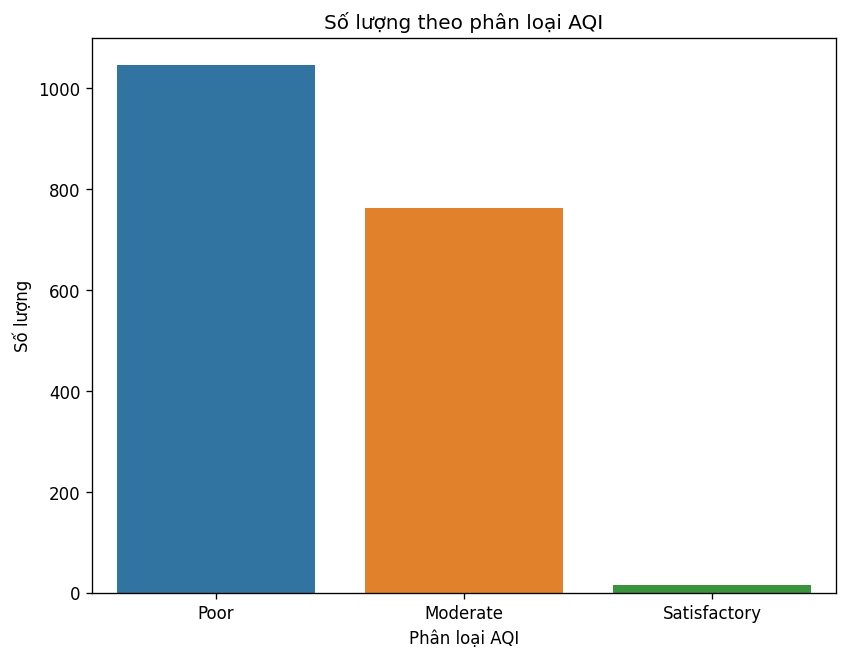

Số lượng theo phân loại AQI:
Poor: 1047
Moderate: 763
Satisfactory: 16


In [ ]:
# Đếm số lượng các phân loại
aqi_bucket_counts = df_delhi_3["AQI_Category"].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
sns.countplot(x="AQI_Category", data=df_delhi_3)
plt.xlabel("Phân loại AQI")
plt.ylabel("Số lượng")
plt.title("Số lượng theo phân loại AQI")
plt.show()

# In số lượng các phân loại
print("Số lượng theo phân loại AQI:")
for bucket, count in aqi_bucket_counts.items():
    print(f"{bucket}: {count}")


## 2.5 Tiến hành dự báo theo ARIMA

<ipython-input-80-cea2791013d4>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df_delhi_3.groupby(df_delhi_3['Date'].dt.to_period('M')).mean()


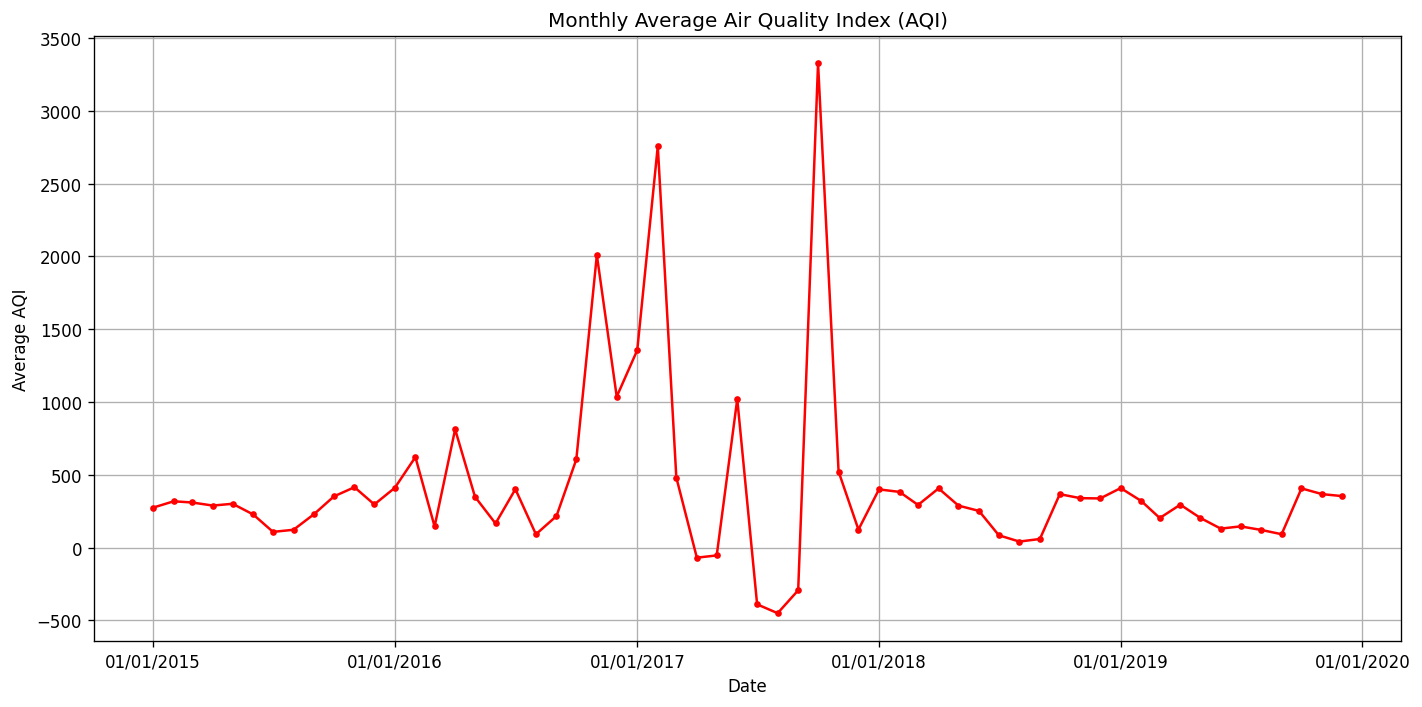

In [ ]:

import matplotlib.dates as mdates

# Nhóm dữ liệu theo giá trị theo tháng và tính giá trị trung bình
df_monthly = df_delhi_3.groupby(df_delhi_3['Date'].dt.to_period('M')).mean()

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 6))
date_formatter = mdates.DateFormatter('%d/%m/%Y')

ax.plot(df_monthly.index.to_timestamp(), df_monthly['AQI'], 'o-', markersize=3, color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Average AQI')
ax.set_title('Monthly Average Air Quality Index (AQI)')
ax.xaxis.set_major_formatter(date_formatter)
ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
MA = 3

# Tính moving average cho cột AQI_calculated
df_delhi_3['MA'] = df_delhi_3['AQI'].rolling(window=MA, min_periods=1).mean()

# Tạo cột Month từ cột Date
df_delhi_3['Month'] = df_delhi_3['Date'].dt.to_period('M')

# Nhóm dữ liệu theo cột Month và tính giá trị trung bình của moving average
df_monthly = df_delhi_3.groupby('Month')['MA'].mean()

print(df_monthly)


Month
2015-01     278.204301
2015-02     285.333333
2015-03     297.354839
2015-04     300.211111
2015-05     302.913978
2015-06     242.477778
2015-07     123.505376
2015-08     115.215054
2015-09     214.700000
2015-10     361.182796
2015-11     401.811111
2015-12     303.451613
2016-01     389.645161
2016-02     602.206897
2016-03     107.193548
2016-04     774.488889
2016-05     414.225806
2016-06     194.033333
2016-07     202.021505
2016-08     182.311828
2016-09     365.388889
2016-10     541.311828
2016-11    2028.633333
2016-12    1023.344086
2017-01    1384.677419
2017-02    2655.511905
2017-03     488.139785
2017-04     144.388889
2017-05    -175.376344
2017-06     227.011111
2017-07    -143.505376
2017-08     210.741935
2017-09    -486.600000
2017-10    1577.473118
2017-11    1250.955556
2017-12    1226.333333
2018-01     428.010753
2018-02     340.392857
2018-03     276.096774
2018-04     380.711111
2018-05     321.000000
2018-06     276.255556
2018-07      86.290323
2018-

In [ ]:
# Chuyển cột "Date" thành kiểu dữ liệu ngày tháng
df_delhi_3['Date'] = pd.to_datetime(df_delhi_3['Date'])

# Nhóm dữ liệu theo cột "Month" và tính giá trị trung bình của AQI_calculated, MA_3 và MA_5
df_monthly = df_delhi_3.groupby(df_delhi_3['Date'].dt.to_period('M')).mean()

# Chuyển cột "Month" về dạng chuỗi
df_monthly['Month'] = df_monthly.index.astype(str)

# Sắp xếp theo thứ tự thời gian
df_monthly = df_monthly.sort_values('Month')

# Tính moving average cho cột AQI_calculated
df_delhi_3['MA_3'] = df_delhi_3['AQI'].rolling(window=3, min_periods=1).mean()
df_delhi_3['MA_5'] = df_delhi_3['AQI'].rolling(window=5, min_periods=1).mean()



<ipython-input-84-e1c547c3d115>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df_delhi_3.groupby(df_delhi_3['Date'].dt.to_period('M')).mean()


In [ ]:
df_delhi_3

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Category,MA,Month,MA_3,MA_5
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,300,Poor,300.000000,2015-01,300.000000,300.000000
10230,Delhi,2015-02-01,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,316,Poor,308.000000,2015-02,308.000000,308.000000
10231,Delhi,2015-03-01,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,300,Poor,305.333333,2015-03,305.333333,305.333333
10232,Delhi,2015-04-01,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,301,Poor,305.666667,2015-04,305.666667,304.250000
10233,Delhi,2015-05-01,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,309,Poor,303.333333,2015-05,303.333333,305.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12050,Delhi,2019-12-27,240.07,371.45,28.66,54.60,54.95,52.64,1.39,7.88,27.55,4.62,32.86,0.20,613,Poor,634.666667,2019-12,634.666667,599.600000
12051,Delhi,2019-12-28,275.60,426.12,60.13,55.98,83.47,50.47,1.96,10.26,27.92,6.70,39.22,0.40,485,Poor,587.666667,2019-12,587.666667,577.000000
12052,Delhi,2019-12-29,326.79,500.15,32.73,57.76,61.51,49.61,1.86,10.25,35.11,6.28,33.00,0.34,100,Moderate,399.333333,2019-12,399.333333,497.800000
12053,Delhi,2019-12-30,333.43,486.35,54.97,55.61,79.04,50.75,2.24,11.15,26.44,8.00,47.12,0.72,82,Moderate,222.333333,2019-12,222.333333,389.000000


KeyError: ignored

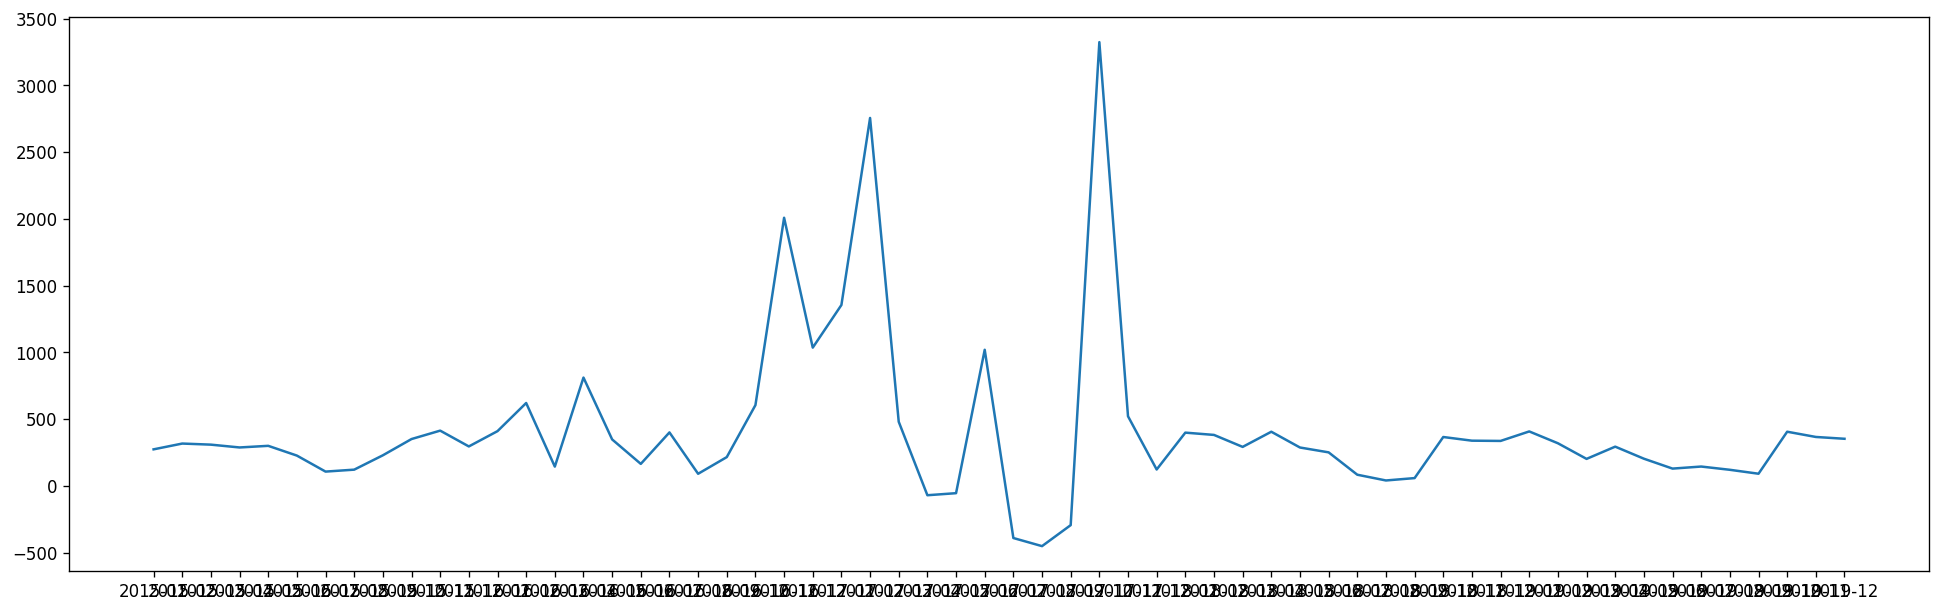

In [ ]:
  # Chuyển đổi kiểu dữ liệu của cột 'Month' từ Period sang string
  df_monthly['Month'] = df_monthly.index.strftime('%Y-%m')

  # Tạo một hình ảnh mới với kích thước lớn
  plt.figure(figsize=(20, 6))
  # Vẽ đồ thị
  plt.plot(df_monthly['Month'], df_monthly['AQI'], '-', markersize=8)
  plt.plot(df_monthly['Month'], df_monthly['MA_3'], '-', markersize=8)
  plt.plot(df_monthly['Month'], df_monthly['MA_5'], '-', markersize=8)
  plt.grid(linestyle='--')
  plt.ylabel('AQI', fontsize=12)
  plt.xlabel('Tháng', fontsize=12)
  plt.legend(['RawData', 'MA=3', 'MA=5'])

  # Thiết lập khoảng cách giữa các nhãn trên trục x
  plt.xticks(rotation=45)

  plt.show()


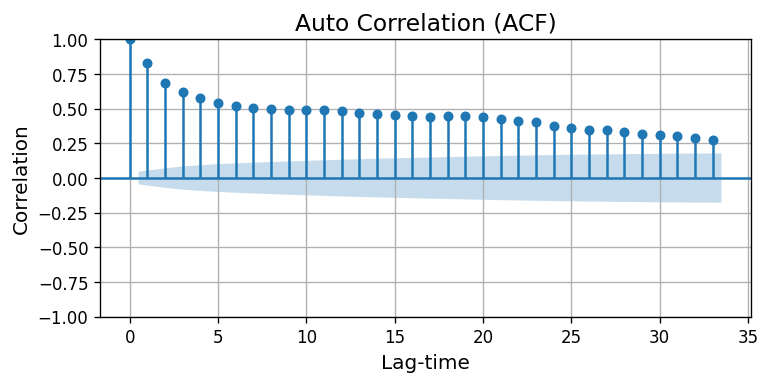

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


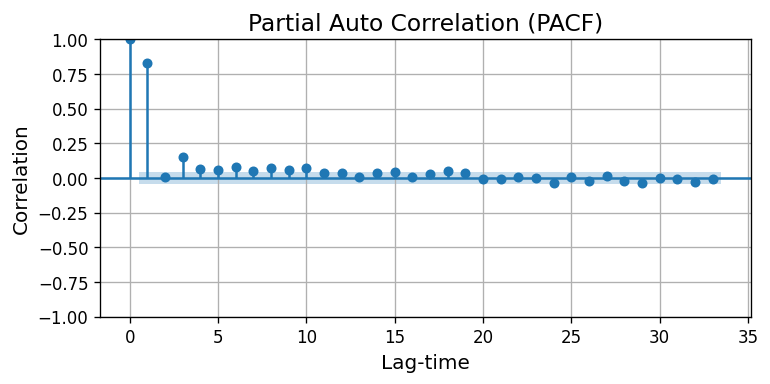

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Vẽ đồ thị tự tương quan (ACF)
plot_acf(df_delhi_3['AQI_calculated'])
plt.grid(linestyle='-')
plt.ylabel('Correlation', fontsize=12)
plt.xlabel('Lag-time', fontsize=12)
plt.title('Auto Correlation (ACF)', fontsize=14)
plt.show()

# Vẽ đồ thị tự tương quan riêng phần (PACF)
plot_pacf(df_delhi_3['AQI_calculated'])
plt.grid(linestyle='-')
plt.ylabel('Correlation', fontsize=12)
plt.xlabel('Lag-time', fontsize=12)
plt.title('Partial Auto Correlation (PACF)', fontsize=14)
plt.show()


In [ ]:
#installing pmdarima
!pip install pmdarima;
from pmdarima import auto_arima;
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
auto_arima(y=df_delhi_3['AQI_calculated'], start_p=1, start_P=1, start_q=1, start_Q=1, seasonal=True, m=12, stepwise=True).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:               SARIMAX(2, 0, 2)   Log Likelihood              -10213.736
Date:                Tue, 04 Jul 2023   AIC                          20439.473
Time:                        12:03:57   BIC                          20472.532
Sample:                             0   HQIC                         20451.667
                               - 1826                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.6688      1.166      2.289      0.022       0.384       4.954
ar.L1          1.4445      0.047     30.780      0.000       1.353       1.536
ar.L2         -0.4554      0.044    -10.274      0.000      -0.542      -0.368
ma.L1         -0.6534      0.046    -14.051      0.000      -0.745      -0.562
ma.L2         -0.1910      0.028     -6.766      0.000      -0.246      -0.136
sigma2      4210.8797     93.055     45.252      0.000    4028.496    4393.264
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               625.69
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.33
Prob(H) (two-sided):                  0.64   Kurtosis:                         5.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Chuyển cột 'Date' thành chỉ mục (index)
df_delhi_3['Date'] = pd.to_datetime(df_delhi_3['Date'])
df_delhi_3.set_index('Date', inplace=True)

In [ ]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# chuyển đổi AQI_calculated sang Num
X = df_delhi_3['AQI_calculated'].values

# Tạo tập train và test
train = X[(df_delhi_3.index.year >= 2015) & (df_delhi_3.index.year <= 2018)]
test = X[df_delhi_3.index.year == 2019]

history = [i for i in train]
predictions = []

# Perform one-step ahead forecasting
for t in range(len(test)):
    model = ARIMA(history, order=(12, 1, 1))  # Set the values for p, d, and q
    model_fit = model.fit()
    output = model_fit.forecast()  # Forecast the entire time series
    y_pred = output[0]  # Get the forecasted value at t+1
    predictions.append(y_pred)
    obs = test[t]
    history.append(obs)
    print('Giá trị dự báo=%f, Giá trị thực tế=%f' % (y_pred, obs))

# Evaluate forecasts
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('MSE: %.2f' % mse)
print('RMSE: %.2f' % rmse)


Giá trị dự báo=457.665980, Giá trị thực tế=461.020000
Giá trị dự báo=449.078836, Giá trị thực tế=515.720000
Giá trị dự báo=493.632143, Giá trị thực tế=519.340000
Giá trị dự báo=487.373364, Giá trị thực tế=388.790000
Giá trị dự báo=394.388362, Giá trị thực tế=411.490000
Giá trị dự báo=429.721470, Giá trị thực tế=254.660000
Giá trị dự báo=288.902316, Giá trị thực tế=283.880000
Giá trị dự báo=338.044404, Giá trị thực tế=242.020000
Giá trị dự báo=285.924218, Giá trị thực tế=238.940000
Giá trị dự báo=287.290169, Giá trị thực tế=278.870000
Giá trị dự báo=314.911590, Giá trị thực tế=432.200000
Giá trị dự báo=428.222992, Giá trị thực tế=465.890000
Giá trị dự báo=438.479404, Giá trị thực tế=403.320000
Giá trị dự báo=397.554824, Giá trị thực tế=173.940000
Giá trị dự báo=221.522528, Giá trị thực tế=229.100000
Giá trị dự báo=290.538565, Giá trị thực tế=424.070000
Giá trị dự báo=418.964706, Giá trị thực tế=519.490000
Giá trị dự báo=469.960679, Giá trị thực tế=364.610000
Giá trị dự báo=342.851792, G

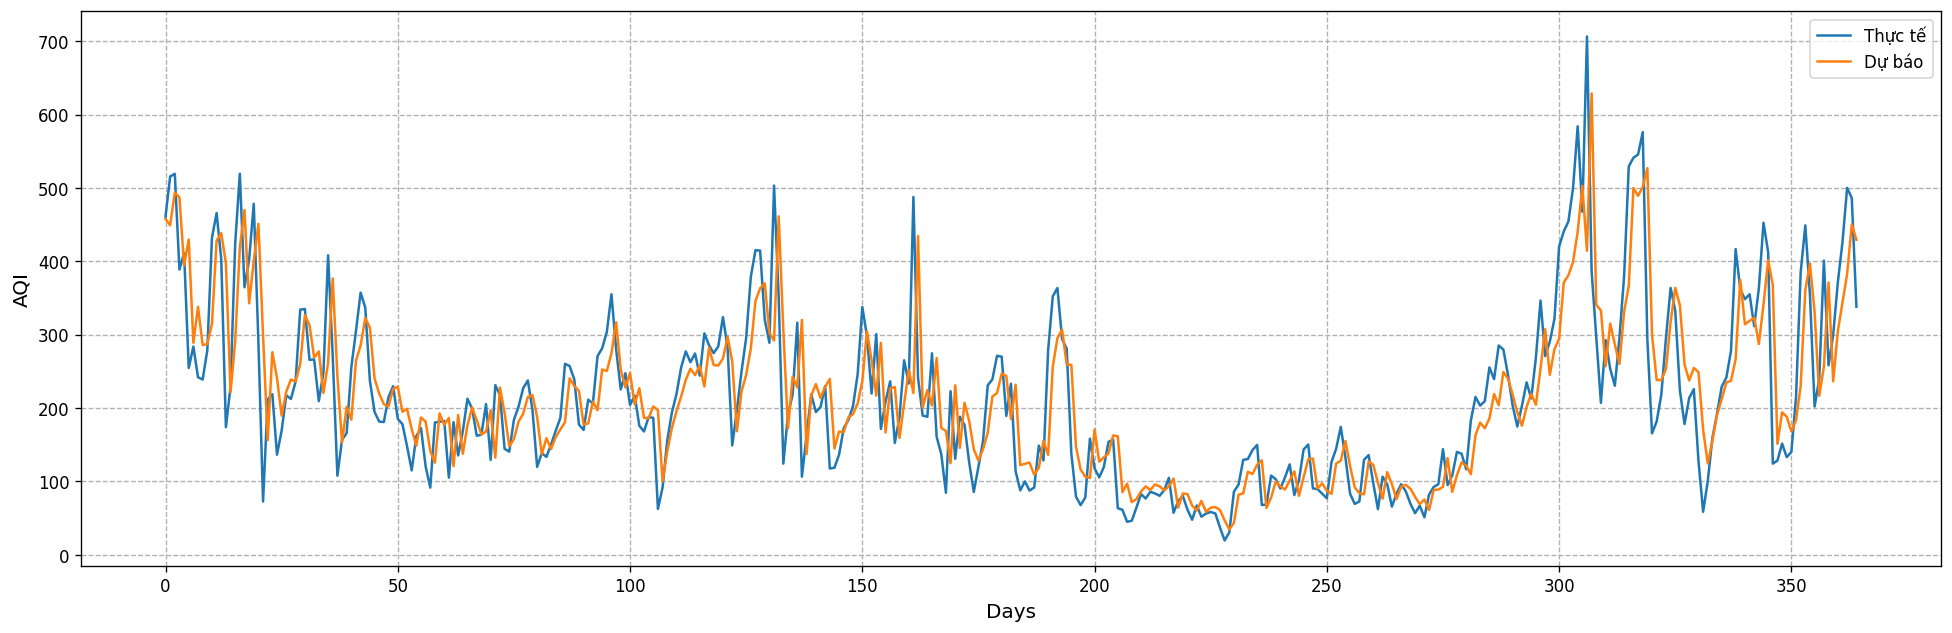

In [ ]:
# Plot the actual and predicted values
fig, ax = plt.subplots(figsize=(20, 6))  # Set the figsize to (width, height)

ax.plot(test, '-', markersize=8)
ax.plot(predictions, '-', markersize=8)
ax.grid(linestyle='--')
ax.set_ylabel('AQI', fontsize=12)
ax.set_xlabel('Days', fontsize=12)
ax.legend(['Thực tế', 'Dự báo'])

plt.show()


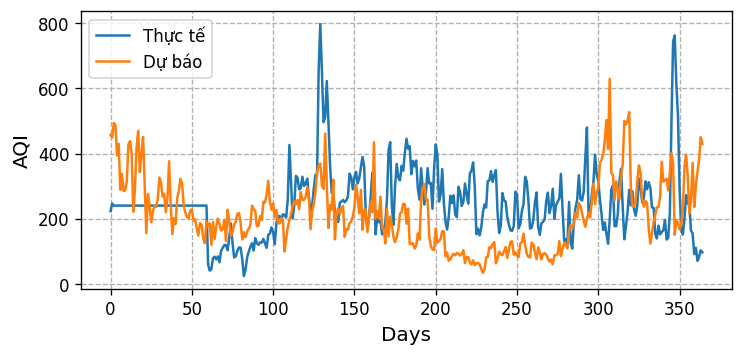

In [ ]:
# Filter the data for plotting
forecasted_values = predictions[-365:]  # Select the forecasted values for 365 days
actual_values = X[size-365:size]  # Select the actual values for the corresponding period

# Plot the actual and predicted values
plt.plot(actual_values, '-', markersize=8)
plt.plot(forecasted_values, '-', markersize=8)
plt.grid(linestyle='--')
plt.ylabel('AQI', fontsize=12)
plt.xlabel('Days', fontsize=12)
plt.legend(['Thực tế', 'Dự báo'])
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Chuyển cột 'AQI_calculated' thành mảng numpy
X = df_delhi_3['AQI_calculated'].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]

# Kết hợp tập huấn luyện và tập kiểm tra để mô hình hóa
history = np.concatenate((train, test[:100]))

predictions = []

# Thực hiện dự báo một bước thời gian cho 3 năm tiếp theo (2020-2022)
for year in range(2020, 2023):
    for month in range(1, 13):
        model = ARIMA(history, order=(12, 1, 6))  # Thiết lập giá trị p, d, và q
        model_fit = model.fit()
        output = model_fit.forecast()  # Dự báo giá trị tiếp theo
        y_pred = output[0]  # Lấy giá trị dự báo tại thời điểm t+1
        predictions.append(y_pred)
        history = np.append(history, y_pred)

# In các giá trị dự báo cho mỗi tháng từ năm 2020
months = pd.date_range(start='2020-01-01', end='2022-12-31', freq='M')
for i, pred in enumerate(predictions):
    print('Dự báo AQI cho {}: {:.2f}'.format(months[i].strftime('%Y-%m'), pred))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: Conver

Dự báo AQI cho 2020-01: 234.56
Dự báo AQI cho 2020-02: 218.36
Dự báo AQI cho 2020-03: 206.56
Dự báo AQI cho 2020-04: 203.72
Dự báo AQI cho 2020-05: 204.22
Dự báo AQI cho 2020-06: 200.76
Dự báo AQI cho 2020-07: 200.98
Dự báo AQI cho 2020-08: 203.76
Dự báo AQI cho 2020-09: 203.70
Dự báo AQI cho 2020-10: 205.98
Dự báo AQI cho 2020-11: 211.36
Dự báo AQI cho 2020-12: 213.94
Dự báo AQI cho 2021-01: 214.15
Dự báo AQI cho 2021-02: 217.31
Dự báo AQI cho 2021-03: 220.58
Dự báo AQI cho 2021-04: 220.32
Dự báo AQI cho 2021-05: 219.59
Dự báo AQI cho 2021-06: 221.53
Dự báo AQI cho 2021-07: 222.39
Dự báo AQI cho 2021-08: 221.08
Dự báo AQI cho 2021-09: 220.61
Dự báo AQI cho 2021-10: 221.82
Dự báo AQI cho 2021-11: 220.43
Dự báo AQI cho 2021-12: 218.27
Dự báo AQI cho 2022-01: 218.96
Dự báo AQI cho 2022-02: 219.76
Dự báo AQI cho 2022-03: 217.75
Dự báo AQI cho 2022-04: 216.98
Dự báo AQI cho 2022-05: 218.54
Dự báo AQI cho 2022-06: 218.36
Dự báo AQI cho 2022-07: 216.57
Dự báo AQI cho 2022-08: 217.25
Dự báo A

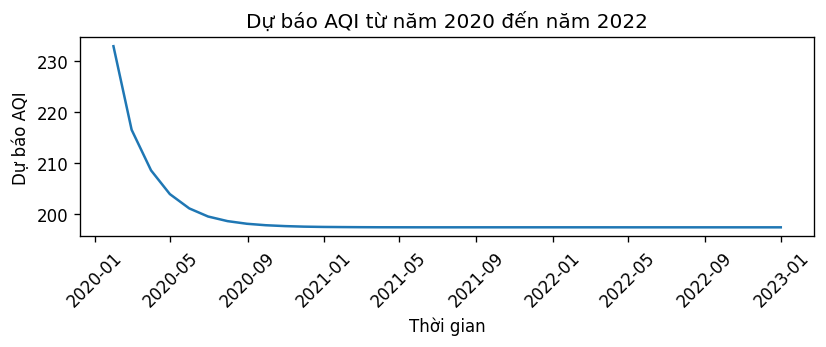

In [ ]:
# Tạo danh sách các tháng từ năm 2020 đến năm 2022
months = pd.date_range(start='2020-01-01', end='2022-12-31', freq='M')

# Tạo biểu đồ dự báo
plt.plot(months, predictions)
plt.xlabel('Thời gian')
plt.ylabel('Dự báo AQI')
plt.title('Dự báo AQI từ năm 2020 đến năm 2022')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()